



1.   Name: HARDIK AGRAWAL
2.   RA no.: RA2211027010007
3.   Section: AD-1



QoS Optimization for Game Streaming

In [ ]:
pip install numpy pandas collections plotly matplotlib

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os


In [ ]:
data = pd.read_csv("/content/healthygamer_gg_testdata.csv") # Reading data with using pandas

DATASET EDA

In [ ]:
data = data.dropna() # Dropping NaN values

In [ ]:
data.head()

,user,channel,message,timestamp
0,itztony1702,healthygamer_gg,BibleThump BibleThump,2021-07-16 14:05:22
1,flaredrip,healthygamer_gg,SUPERHERO BibleThump BibleThump,2021-07-16 14:05:23
2,modxta23,healthygamer_gg,GOOD DAD FeelsGoodMan,2021-07-16 14:05:23
3,reaperdiff,healthygamer_gg,FeelsStrongMan,2021-07-16 14:05:23
4,3rdkira,healthygamer_gg,drhgWeird,2021-07-16 14:05:25


In [ ]:
data.tail()

,user,channel,message,timestamp
7722,luckman51,healthygamer_gg,no he def new,2021-07-16 15:38:51
7723,mpatricko,healthygamer_gg :I know chat can be slow somet...,P,2021-07-16 15:39:05
7724,luckman51,healthygamer_gg,if u have big bobs. then make money with it,2021-07-16 15:39:29
7726,0v3rki1192,healthygamer_gg,like does he actually now what content she mak...,2021-07-16 15:41:12
7727,wizz4e,healthygamer_gg,he 100% didn't knew/didn't check,2021-07-16 15:42:48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7626 entries, 0 to 7727
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       7626 non-null   object
 1   channel    7626 non-null   object
 2   message    7626 non-null   object
 3   timestamp  7626 non-null   object
dtypes: object(4)
memory usage: 297.9+ KB


As you can see we just have object data

In [ ]:
data_message = data.message
counter_data = Counter(data.message)
data_most_common_message = counter_data.most_common(15)
data_most_common_message = pd.DataFrame(data_most_common_message)
data_most_common_message.columns = ["a","b"] # when we transform this dataframe pandas names columns 0,1 and we change it to a and b because when we visualaze data they makes some errors
data_most_common_message

,a,b
0,Sadge,266
1,KEKW,247
2,<3,241
3,monkaW,136
4,FeelsStrongMan,135
5,Pog,108
6,EZ,107
7,LUL,105
8,LULW,100
9,OMEGALUL,89


We find most common 15 words on chat

In [ ]:
trace1 = go.Bar(
                x = data_most_common_message.a,
                y = data_most_common_message.b,
                name = "most_common_message",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = data_most_common_message.a)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In this plot we see most common words on twitch chat

In [ ]:
counter_data_user = Counter(data.user)
data_most_common_user = counter_data_user.most_common(15)
data_most_common_user = pd.DataFrame(data_most_common_user)
data_most_common_user.columns = ["a","b"]
data_most_common_user

,a,b
0,kwesiquest,121
1,pogchamp_is_whack30303030,101
2,modxta23,98
3,jackjoejacket,86
4,kingkrishlive,75
5,jaytea111,74
6,mahiel3,70
7,klitkommanda,64
8,lmdoubleg,63
9,error_40420,61


We find most active 15 users on chat

In [ ]:
trace1 = go.Bar(
                x = data_most_common_user.a,
                y = data_most_common_user.b,
                name = "most_common_message",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = data_most_common_user.a)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In this code we can see most active users and how much words they wrote

In [ ]:
counter_data_time = Counter(data.timestamp)
data_most_common_timestamp = counter_data_time.most_common(5)
data_most_common_timestamp = pd.DataFrame(data_most_common_timestamp)
data_most_common_timestamp.columns = ["a","b"]
data_most_common_timestamp

,a,b
0,2021-07-16 15:25:24,22
1,2021-07-16 15:25:35,19
2,2021-07-16 14:27:49,18
3,2021-07-16 15:25:33,17
4,2021-07-16 15:25:21,16


In this code we find most active times in chat

Text(0.5, 1.0, 'Most active times')

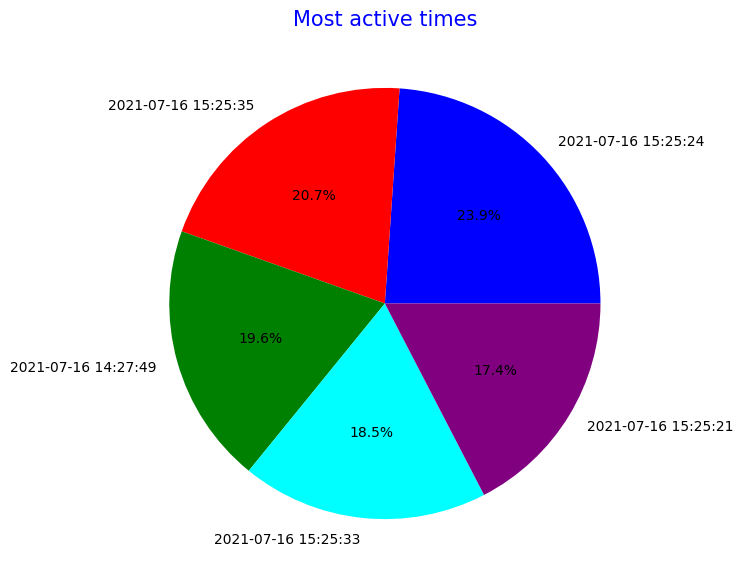

In [ ]:
labels = data_most_common_timestamp.a
colors = ['blue','red',"green","cyan","purple"]
explode = [0,0,0,0,0]
sizes = data_most_common_timestamp.b


plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Most active times',color = 'blue',fontsize = 15)

In this code we see most active times in a pie chart

In [ ]:
counter_data_channel = Counter(data.channel)
data_most_common_channel = counter_data_channel.most_common(5)
data_most_common_channel = pd.DataFrame(data_most_common_channel)
data_most_common_channel.columns = ["a","b"]
data_most_common_channel

,a,b
0,healthygamer_gg,7412
1,healthygamer_gg :,33
2,healthygamer_gg :Pre-order Dr. K's Guide to Me...,20
3,healthygamer_gg :D,20
4,healthygamer_gg :https,13


In [ ]:
fig = px.bar(data_most_common_channel,x="a",y="b")
fig.show()

On this plot we see most active 5 channel

In [ ]:
!pip install transformers datasets emoji --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platf

In [ ]:
import pandas as pd
import numpy as np
import re
import emoji
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
df = pd.read_csv("/content/healthygamer_gg_testdata.csv") # Reading data with using pandas
# Convert emotes and emojis to readable text
def preprocess_message(msg):
    msg = emoji.demojize(msg, delimiters=(" ", " "))
    msg = re.sub(r"http\S+|@\S+|#\S+|[^a-zA-Z0-9\s]", "", msg)  # remove URLs, mentions, hashtags, symbols
    msg = msg.lower().strip()
    return msg

df['clean_message'] = df['message'].astype(str).apply(preprocess_message)
df[['message', 'clean_message']].head()


,message,clean_message
0,BibleThump BibleThump,biblethump biblethump
1,SUPERHERO BibleThump BibleThump,superhero biblethump biblethump
2,GOOD DAD FeelsGoodMan,good dad feelsgoodman
3,FeelsStrongMan,feelsstrongman
4,drhgWeird,drhgweird


Manually Labelling 2000 Rows (For Fine-tuning BERT)

In [ ]:
# Sample a subset to label manually
sample_df = df[['clean_message']].dropna().sample(2000, random_state=42)
sample_df['sentiment'] = ''  # Label manually in Colab UI (Positive, Neutral, Negative)
sample_df.to_csv('manual_label_sample.csv', index=False)


Loading the Labeled Dataset for Fine-Tuning

In [ ]:
import pandas as pd

# Load the labeled dataset
df_labeled = pd.read_csv('/content/labeled_sample_2000_output.csv')

# Map sentiment labels to numeric values
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df_labeled['label'] = df_labeled['sentiment'].map(label_map)

df_labeled[['clean_message', 'sentiment', 'label']].head()


,clean_message,sentiment,label
0,lol,positive,2
1,lul lul lul lul lul lul,neutral,1
2,two poggers,positive,2
3,lul,positive,2
4,college early 20s,negative,0


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import torch

# Filter out invalid or missing messages
df_labeled = df_labeled[df_labeled['clean_message'].notnull()]
df_labeled = df_labeled[df_labeled['clean_message'].apply(lambda x: isinstance(x, str))]

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_labeled['clean_message'].tolist(),
    df_labeled['label'].tolist(),
    test_size=0.2,
    random_state=42
)

# Tokenize text data
train_encodings = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt")
val_encodings = tokenizer(val_texts, padding=True, truncation=True, return_tensors="pt")

# Dataset class for PyTorch
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx])
        }
    def __len__(self):
        return len(self.labels)

# Prepare datasets
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


Establishing Training Arguements

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained BERT model with 3 output labels (negative, neutral, positive)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Define training parameters
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=1,
    save_strategy="epoch"
)

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Evaluate the model on the validation set
trainer.evaluate()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hardik-a241 (hardik-a241-srm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.028400,1.006935
2,1.024700,0.991584
3,0.740300,1.026105


{'eval_loss': 1.0261049270629883,
 'eval_runtime': 88.8593,
 'eval_samples_per_second': 4.366,
 'eval_steps_per_second': 0.551,
 'epoch': 3.0}

In [ ]:
import re

# Function to calculate engagement score
def compute_engagement_score(text):
    if not isinstance(text, str):
        return 0
    word_count = len(text.split())
    emote_count = len(re.findall(r'[A-Z]{2,}', text))  # Twitch-style emotes like POGGERS, LUL, etc.
    length_bonus = min(len(text), 100) // 10
    return min(word_count + emote_count + length_bonus, 10)  # Cap at 10

# Apply engagement scoring
df_labeled['engagement_score'] = df_labeled['clean_message'].apply(compute_engagement_score)

# View sample
df_labeled[['clean_message', 'sentiment', 'engagement_score']].head()

def qos_suggestion(row):
    if row['sentiment'] == 'positive' and row['engagement_score'] >= 7:
        return 'Increase Bitrate'
    elif row['sentiment'] == 'negative' and row['engagement_score'] <= 3:
        return 'Reduce Bitrate'
    elif row['sentiment'] == 'neutral' and row['engagement_score'] >= 5:
        return 'Maintain Bitrate'
    else:
        return 'Pre-buffer / Delay'

# Apply QoS logic
df_labeled['qos_action'] = df_labeled.apply(qos_suggestion, axis=1)

# View results
df_labeled[['clean_message', 'sentiment', 'engagement_score', 'qos_action']].head(10)

df_labeled.to_csv("/content/final_qos_chat_predictions.csv", index=False)



 Plot Sentiment Distribution

<ipython-input-29-72058590592e>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




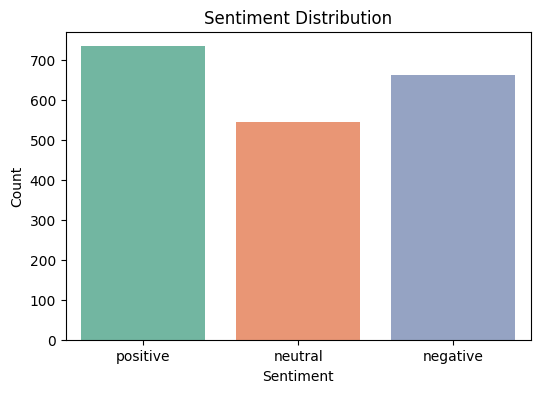

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment counts
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df_labeled, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Engagement Score Distribution

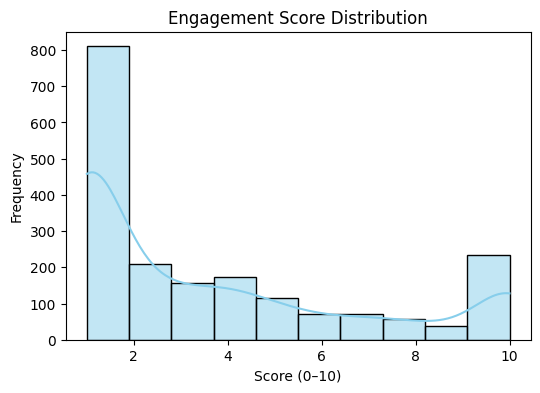

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df_labeled['engagement_score'], bins=10, kde=True, color='skyblue')
plt.title("Engagement Score Distribution")
plt.xlabel("Score (0–10)")
plt.ylabel("Frequency")
plt.show()


QoS Action Breakdown

<ipython-input-31-dd553b4a3be4>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




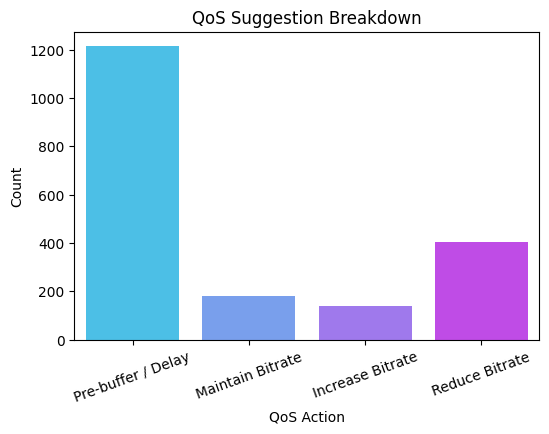

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='qos_action', data=df_labeled, palette='cool')
plt.title("QoS Suggestion Breakdown")
plt.xlabel("QoS Action")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()
